In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
X_train = pd.read_csv('dengue_features_train_cleaned.csv')
y_train = pd.read_csv('dengue_labels_train.csv')

In [3]:
X_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,0.131490,0.127823,0.203130,0.201963,45.702091,298.697750,299.221723,295.244555,...,40.125594,82.173009,45.702091,16.744659,4.900618,27.181438,8.095505,32.446497,22.098043,39.362294
std,5.408314,15.019437,0.137272,0.119478,0.073781,0.083491,43.651356,1.359878,1.260384,1.525955,...,43.313117,7.152190,43.651356,1.540958,3.542762,1.281116,2.127521,1.959090,1.570524,47.285701
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.037400,0.048092,0.154057,0.144455,9.785000,297.657857,298.257143,294.117857,...,13.200000,77.196429,9.785000,15.554643,2.328571,26.314286,6.528571,31.100000,21.100000,8.850000
50%,2002.000000,26.500000,0.115550,0.115926,0.195664,0.190121,38.320000,298.640000,299.285714,295.638571,...,27.300000,80.287857,38.320000,17.084286,2.857143,27.400000,7.350000,32.800000,22.200000,24.050000
75%,2005.000000,39.250000,0.231443,0.213429,0.247461,0.246579,70.227500,299.827500,300.207143,296.457857,...,52.200000,86.437500,70.227500,17.976071,7.632143,28.130804,9.603571,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [38]:
X_train.head(20)#.sort_values(by='weekofyear').head(20)

,index,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
index,,,,,,,,,,,,,,,,,,,,,
0,0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
5,5,sj,1990,23,1990-06-04,0.154550,0.174850,0.254314,0.181743,9.58,...,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1
6,6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,...,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7
7,7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,...,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1
8,8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,...,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1


In [39]:
X_growth = X_train.select_dtypes(exclude='object') / X_train.select_dtypes(exclude='object').shift(1)

TypeError: unsupported operand type(s) for /: 'Categorical' and 'Categorical'

In [53]:
X = X_train.copy()
X['ndvi_ne_growth'] = X.ndvi_ne / X.ndvi_ne.shift(1)
X['ndvi_nw_growth'] = X.ndvi_nw / X.ndvi_nw.shift(1)
X['ndvi_se_growth'] = X.ndvi_se / X.ndvi_se.shift(1)
X['ndvi_sw_growth'] = X.ndvi_sw / X.ndvi_sw.shift(1)
X['ndvi'] = X.ndvi_ne + X.ndvi_nw + X.ndvi_se + X.ndvi_sw
X['ndvi_growth'] = X.ndvi/X.ndvi.shift(1)
X['ndvi_ne_sq'] = X.ndvi_ne * X.ndvi_ne
X['ndvi_nw_sq'] = X.ndvi_nw * X.ndvi_nw
X['ndvi_se_sq'] = X.ndvi_se * X.ndvi_se
X['ndvi_sw_sq'] = X.ndvi_sw * X.ndvi_sw
X['ndvi_sq'] = X.ndvi * X.ndvi
X['ndvi_ne_precip'] = X.ndvi_ne * X.precipitation_amt_mm
X['ndvi_nw_precip'] = X.ndvi_nw * X.precipitation_amt_mm
X['ndvi_se_precip'] = X.ndvi_se * X.precipitation_amt_mm
X['ndvi_sw_precip'] = X.ndvi_sw * X.precipitation_amt_mm
X['ndvi_precip'] = X.ndvi * X.precipitation_amt_mm
X['ndvi_ne_inv'] = 1/X.ndvi_ne
X['ndvi_nw_inv'] = 1/X.ndvi_nw
X['ndvi_se_inv'] = 1/X.ndvi_se
X['ndvi_sw_inv'] = 1/X.ndvi_sw
X['ndvi_sma'] = X.ndvi_ne.rolling(window=20).mean()
X['ndvi_ne_sma'] = X.ndvi_ne.rolling(window=20).mean()
X['ndvi_nw_sma'] = X.ndvi_nw.rolling(window=20).mean()
X['ndvi_se_sma'] = X.ndvi_se.rolling(window=20).mean()
X['ndvi_sw_sma'] = X.ndvi_sw.rolling(window=20).mean()
X['precip_avgtemp'] = X.reanalysis_avg_temp_k * X.precipitation_amt_mm
X['sj'] = X.city == 'sj'
X['total_cases'] = y_train.total_cases
# X_growth['total_cases'] = y_train.total_cases
X.week_start_date = pd.to_datetime(X.week_start_date, format='%d/%m/%Y')
X = X.sort_values(by='week_start_date',)
# X = X.reset_index().drop(columns='index')
X.head()
df = X.copy()

In [7]:
y_train.head(5)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


<AxesSubplot:xlabel='week_start_date'>

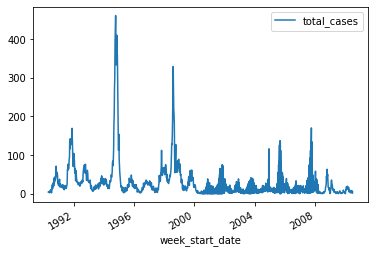

In [8]:
X.plot(y='total_cases', x='week_start_date')

Can see that the number of cases spikes periodically, and at quite extreme levels. Check the mean and median number of weekly cases

<AxesSubplot:xlabel='week_start_date'>

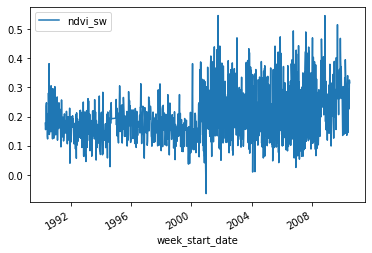

In [60]:
X.plot(y='ndvi_sw', x='week_start_date', )
# X[X.week_start_date.dt.year >= 2000].plot(y='ndvi_sw', x='week_start_date', )

c:\Users\ongwe\Documents\NUS\NUS\Econs\EC4308\project\.venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

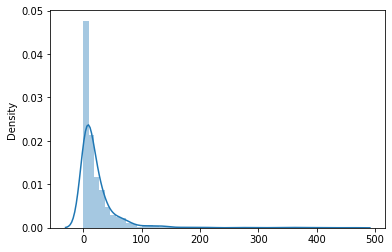

In [9]:
sns.distplot(x=X.total_cases,)

In [10]:
print('mean weekly cases =', y_train.total_cases.mean())
print('median weekly cases =', y_train.total_cases.median())
print('mode weekly cases =', y_train.total_cases.mode())

mean weekly cases = 24.67513736263736
median weekly cases = 12.0
mode weekly cases = 0    0
dtype: int64


Can also see from the below plot that the surge in cases tend to happen in the 2nd half of the year.

<AxesSubplot:xlabel='weekofyear', ylabel='total_cases'>

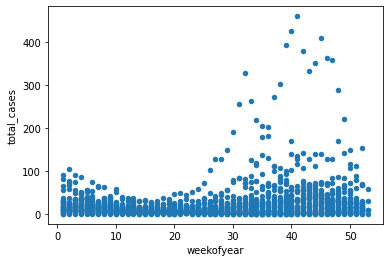

In [11]:
y_train.plot(x='weekofyear', y='total_cases', kind='scatter')

Preliminary check to see correlation of features with label

In [12]:
X.corrwith(X.total_cases)

year                                    -0.306806
weekofyear                               0.216452
ndvi_ne                                 -0.160228
ndvi_nw                                 -0.175476
ndvi_se                                 -0.167892
ndvi_sw                                 -0.144173
precipitation_amt_mm                    -0.039817
reanalysis_air_temp_k                    0.264158
reanalysis_avg_temp_k                    0.149771
reanalysis_dew_point_temp_k              0.140224
reanalysis_max_air_temp_k               -0.192929
reanalysis_min_air_temp_k                0.325805
reanalysis_precip_amt_kg_per_m2         -0.011238
reanalysis_relative_humidity_percent    -0.134148
reanalysis_sat_precip_amt_mm            -0.039817
reanalysis_specific_humidity_g_per_kg    0.127380
reanalysis_tdtr_k                       -0.279782
station_avg_temp_c                       0.115131
station_diur_temp_rng_c                 -0.239443
station_max_temp_c                      -0.040575


<AxesSubplot:ylabel='total_cases'>

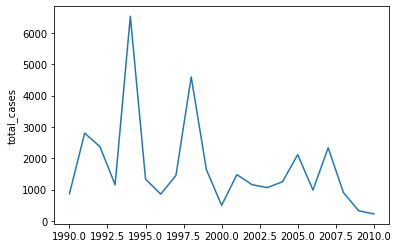

In [13]:
sns.lineplot(x=y_train.year.unique(), y=y_train.groupby(['year']).total_cases.sum())

Quick visual above to see the number of cases over the years

In [68]:
X[X.city == 'sj'].total_cases.describe()

count    936.000000
mean      34.180556
std       51.381372
min        0.000000
25%        9.000000
50%       19.000000
75%       37.000000
max      461.000000
Name: total_cases, dtype: float64

In [69]:
X[X.city == 'iq'].total_cases.describe()

count    520.000000
mean       7.565385
std       10.765478
min        0.000000
25%        1.000000
50%        5.000000
75%        9.000000
max      116.000000
Name: total_cases, dtype: float64

<AxesSubplot:>

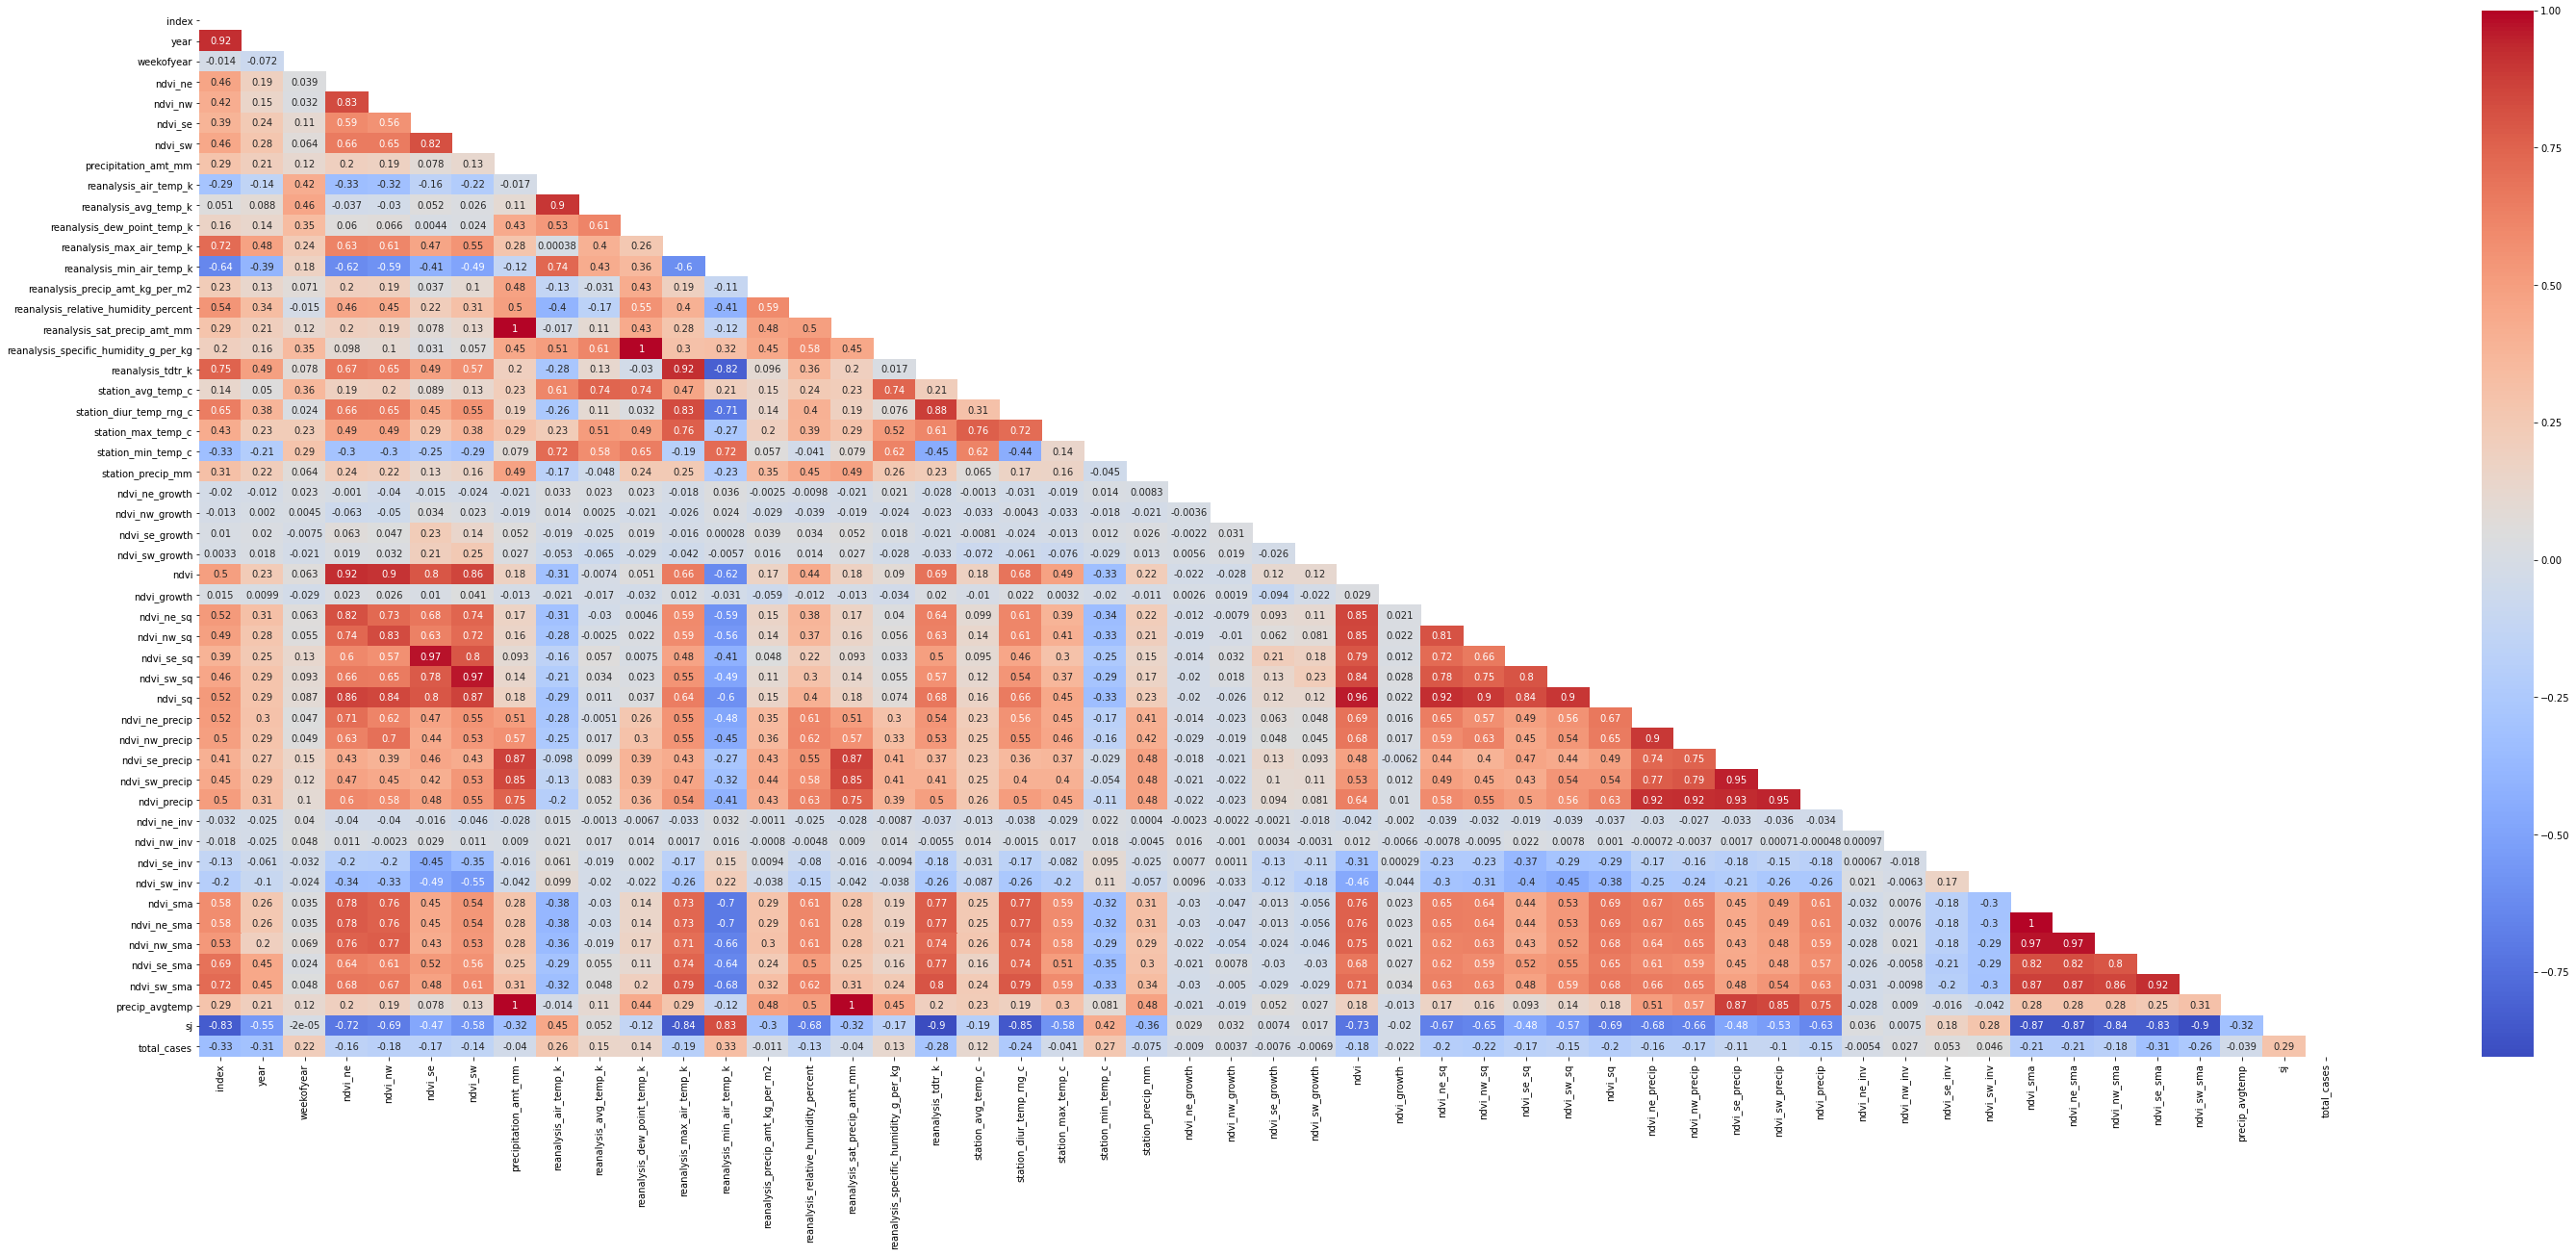

In [54]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(50,20))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='coolwarm', annot=True, mask=mask)
# corr.style.background_gradient()

Correlation heatmap to understand how features are correlated with the total cases and also the correlation of features with one another. Some features seem to be highly correlated to one another.

# Data cleaning
Check for missing values first and decide what to do

In [16]:
test = pd.read_csv('dengue_features_test_cleaned.csv')
test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,29/04/2008,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,6/5/2008,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,13/05/2008,-0.001500,-0.016133,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,20/05/2008,0.027650,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,27/05/2008,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,28/05/2013,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,4/6/2013,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,11/6/2013,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,18/06/2013,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [17]:
test.year.describe()

count     416.000000
mean     2010.766827
std         1.434835
min      2008.000000
25%      2010.000000
50%      2011.000000
75%      2012.000000
max      2013.000000
Name: year, dtype: float64

In [18]:
df.apply(lambda y: y.isnull().sum())

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [19]:
df[df.isnull().any(axis=1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,sj,total_cases


257 out of 1456 rows in the training dataset contains missing values

In [20]:
X_test = pd.read_csv('dengue_features_test_cleaned.csv')
X_test.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [21]:
X_test

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,29/04/2008,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,6/5/2008,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,13/05/2008,-0.001500,-0.016133,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,20/05/2008,0.027650,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,27/05/2008,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,28/05/2013,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,4/6/2013,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,11/6/2013,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,18/06/2013,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [22]:
X_test[X_test.isnull().any(1)]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm


63 out of 416 test data contains missing values

In [55]:
sj = df[df.city == 'sj']
iq = df[df.city == 'iq']

<AxesSubplot:>

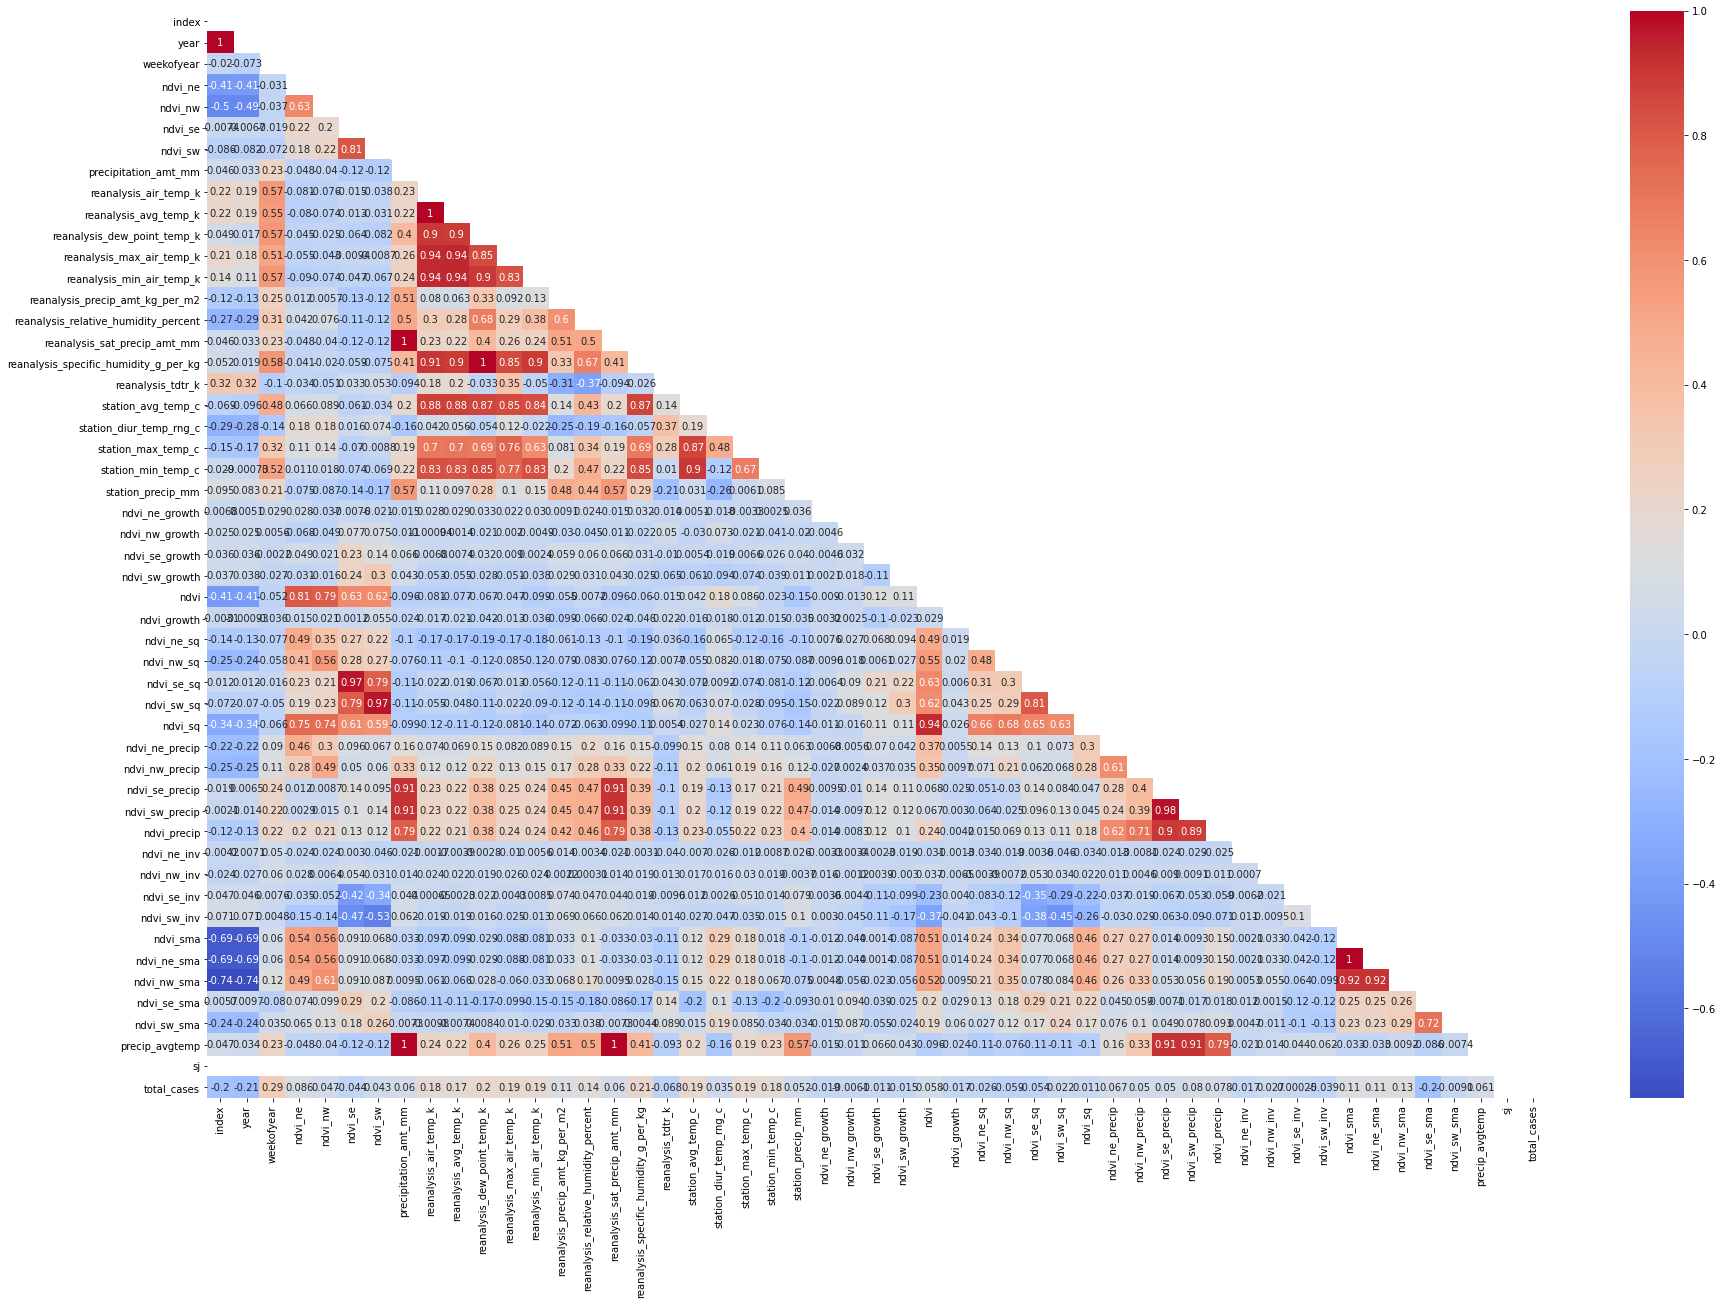

In [56]:
sj_corr = sj.corr()
fig, ax = plt.subplots(figsize=(30,20))
mask = np.triu(np.ones_like(sj_corr, dtype=bool))
sns.heatmap(sj_corr, xticklabels=sj_corr.columns.values, yticklabels=sj_corr.columns.values, cmap='coolwarm', annot=True, mask=mask)

<AxesSubplot:>

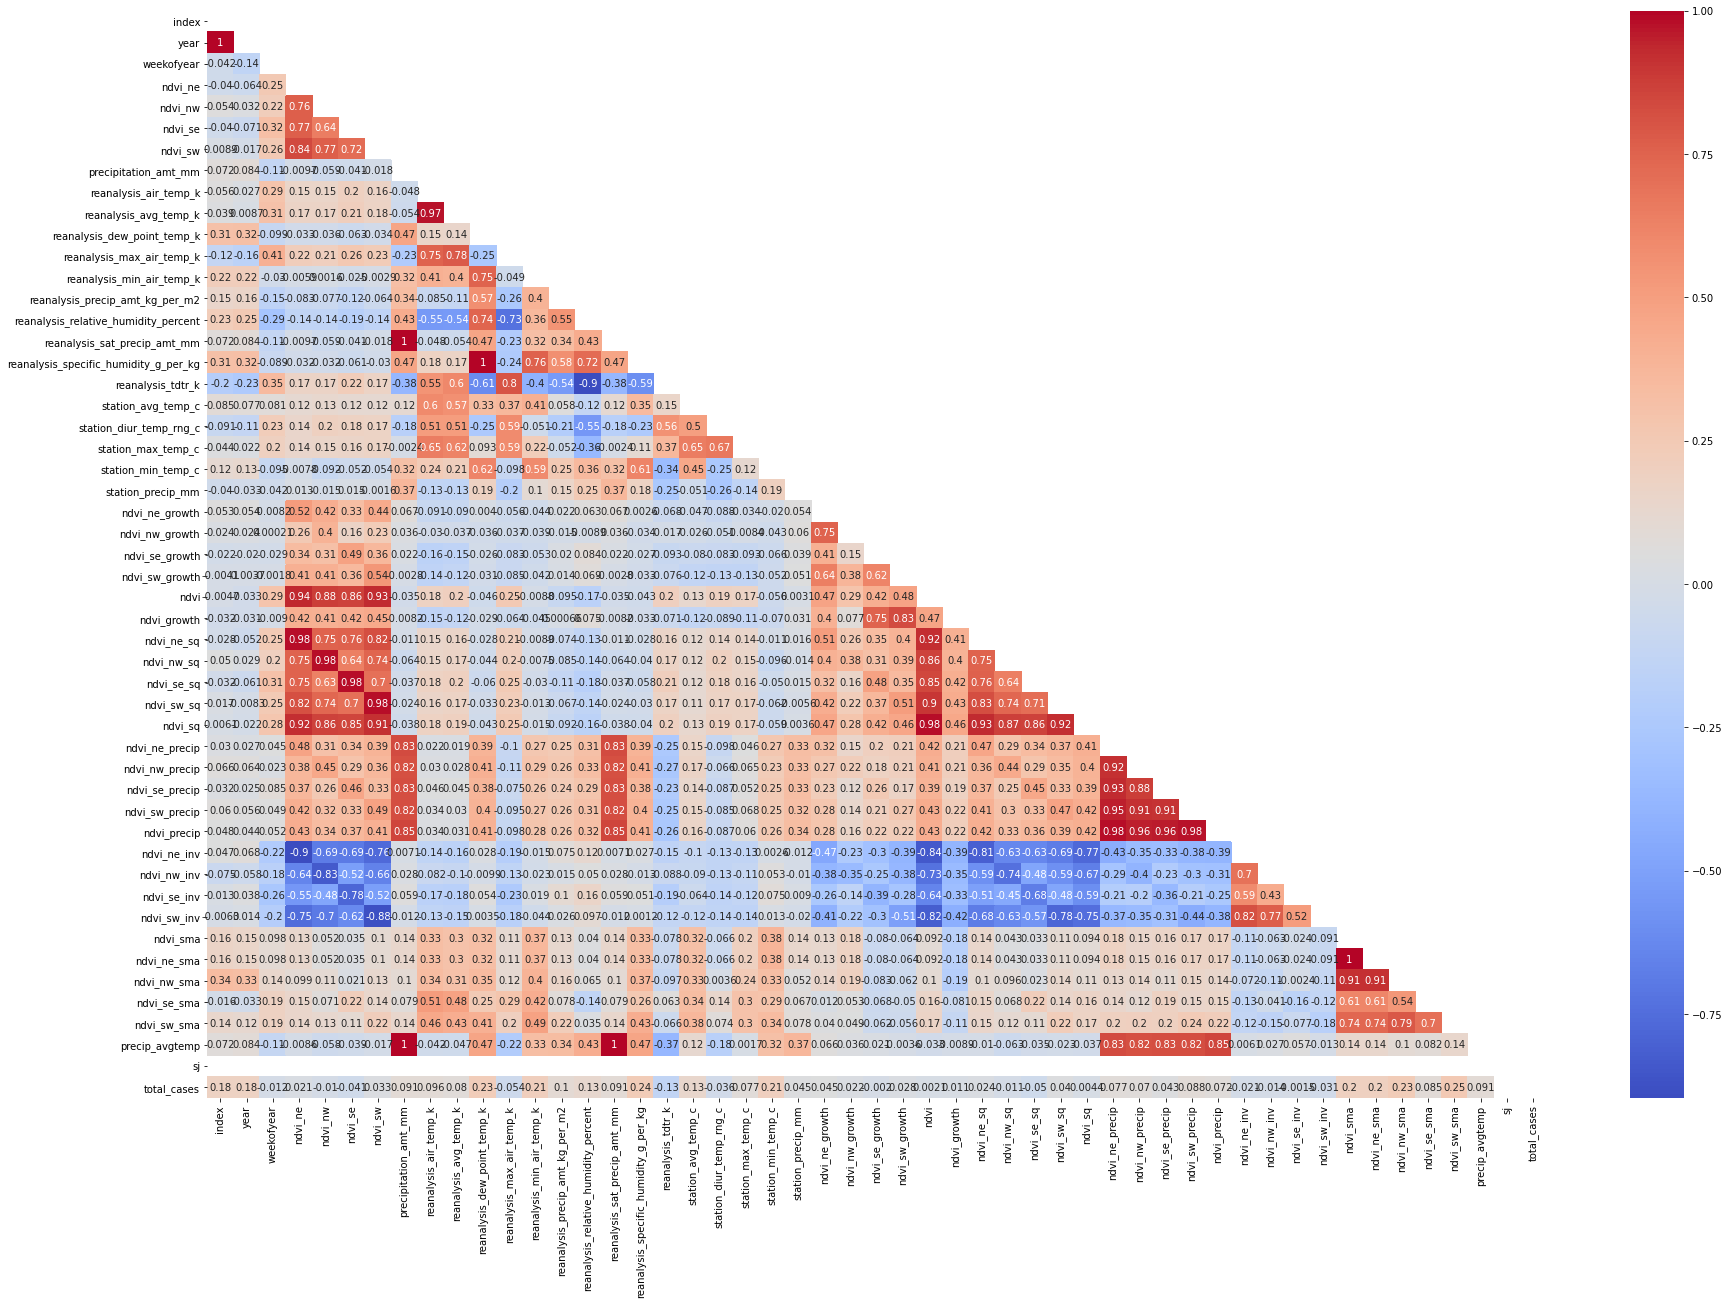

In [57]:
iq_corr = iq.corr()
fig, ax = plt.subplots(figsize=(30,20))
mask = np.triu(np.ones_like(iq_corr, dtype=bool))
sns.heatmap(iq_corr, xticklabels=iq_corr.columns.values, yticklabels=iq_corr.columns.values, cmap='coolwarm', annot=True, mask=mask)

In [26]:
df.drop(columns='total_cases').to_csv('features.csv', index_label=False)

In [27]:
# !pip install featuretools

Defaulting to user installation because normal site-packages is not writeable


In [15]:
import featuretools as ft
es = ft.EntitySet(id='X_train')
es

Entityset: X_train
  DataFrames:
  Relationships:
    No relationships

In [37]:
X_train.index.name = 'index'
X_train.index.name
y_train.index.name = 'label_index'
es = es.add_dataframe(X_train, dataframe_name='X_training', index='index')
es = es.add_dataframe(y_train, dataframe_name='labels', index='label_index')
tableR = ft.Relationship(es, 'X_training', 'index', 'labels', 'label_index')#,es['X_training']['city'], es['labels']['city'])
es = es.add_relationship(tableR)
es

KeyError: 'DataFrame <Relationship: labels.label_index -> X_training.index> does not exist in X_train'

In [30]:
ft.dfs(X_train, target_dataframe_name=y_train, entityset=es)

TypeError: unhashable type: 'DataFrame'

In [28]:
X

NameError: name 'X' is not defined